In [7]:
%pylab inline
import pandas
import px4tools

Populating the interactive namespace from numpy and matplotlib


0.39997948617505397

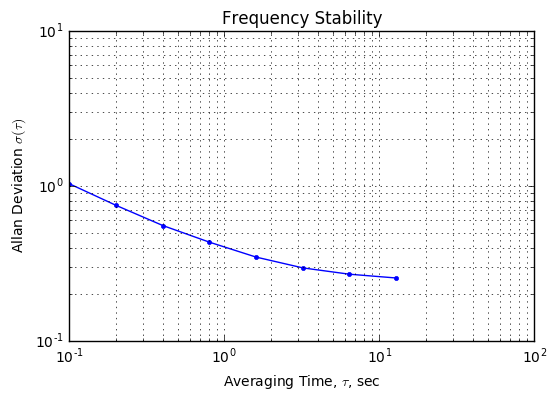

In [8]:
dt_sample = 0.1
tau = 500
x = np.arange(0, 1000, dt_sample)
    
y = 1*np.exp(-x/tau) + np.random.randn(len(x))
data = pandas.Series(data=y, index=x)
px4tools.ulog.plot_allan_variance(data, dt_sample)

336.95836398908364

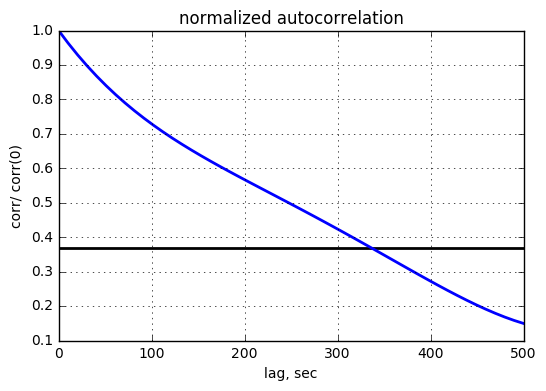

In [10]:
plot_autocorrelation(data, dt_sample)